# Import Libreries

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# load text

In [ ]:
file_path = '/content/hp_en.txt'
with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

##Step 1: Remove extra blank spaces and break text into its sentences


In [ ]:
sentences = sent_tokenize(text)

In [ ]:
sentences[:100]

['\ufeff.',
 'http://www.google.com CHAPTER ONE THE BOY WHO LIVED \n\nMr. and Mrs. Dursley, of number four (4), Privet Drive, were proud to say that they were perfectly normal, thank you very much.',
 "They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense.",
 '33 \n\nMr. Dursley was the director of a firm called Grunnings, which made drills.',
 'He was a big, beefy man with hardly any neck, although he did have a very large mustache.',
 'Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors.',
 'The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.',
 '66\n\nThe Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it.',
 "They didn't think they could bear it 

# Step 2-2: Convert uppercase letters to lowercase letters


In [ ]:
lowercase_text = text.lower()

# Step 2-3-3: Tokenize each sentence into its words


In [ ]:
words = [word_tokenize(sentence) for sentence in sentences]

# Step 4-2: Remove numbers and URLs


In [ ]:
def remove_numbers_and_urls(text):
    text_without_numbers = re.sub(r'\d+', '', text)
    text_without_urls = re.sub(r'http\S+', '', text_without_numbers)
    return text_without_urls



In [ ]:
text_without_numbers_and_urls = remove_numbers_and_urls(lowercase_text)

In [ ]:
text_without_numbers_and_urls[:1000]

"\ufeff.  chapter one the boy who lived \n\nmr. and mrs. dursley, of number four (), privet drive, were proud to say that they were perfectly normal, thank you very much. they were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense.  \n\nmr. dursley was the director of a firm called grunnings, which made drills. he was a big, beefy man with hardly any neck, although he did have a very large mustache. mrs. dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. the dursleys had a small son called dudley and in their opinion there was no finer boy anywhere. \n\nthe dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. they didn't think they could bear it if anyone found out about the potters. mrs. potter was mrs.

# Step 2-5: Remove punctuation marks and stop words


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def remove_punctuation_and_stopwords(words):
    words_without_punctuation = [word for word in words if word.isalnum()]
    english_stopwords = set(stopwords.words('english'))
    words_without_stopwords = [word for word in words_without_punctuation if word.lower() not in english_stopwords]
    return words_without_stopwords



In [ ]:
processed_words = [remove_punctuation_and_stopwords(word_tokenize(sentence)) for sentence in sent_tokenize(text_without_numbers_and_urls)]


# Step 2-6: Draw word cloud
# Concatenate all words from processed_words into a single list


In [ ]:
all_words = [word for sublist in processed_words for word in sublist]

# Join the words into a single string for word cloud visualization




In [ ]:
text_for_wordcloud = ' '.join(all_words)


# Generate word cloud


In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)



# Plot word cloud

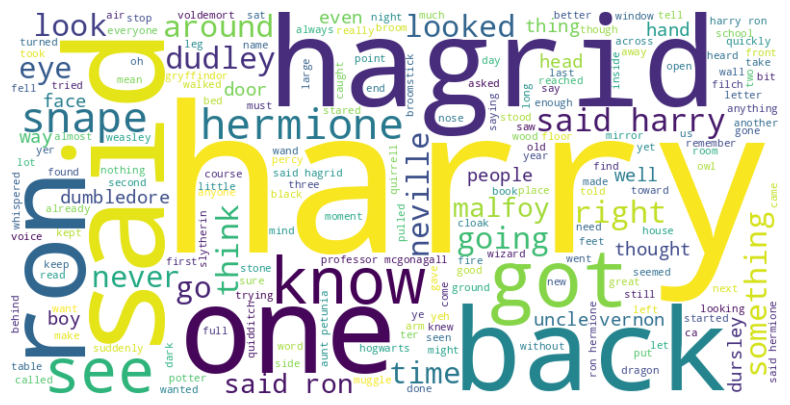

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()